In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


import glob

# Define the directory path where the CSV files are located
input_path =r'../../data/promice/preprocessed/daily/'
pattern = '*.csv'
#staion_list = ['SCO_L.csv','KAN_L.csv']

# Use glob to get a list of all files that match the pattern
filenames = glob.glob(input_path + pattern)


data_collection = []
for file in filenames:
    data = pd.read_csv(file, index_col=False)
    data_collection.append(data)
data = pd.concat(data_collection)

data = data.reset_index(drop=True)


#data = pd.read_csv('../data//promice/preprocessed/daily/SCO_L.csv')
data = data.drop(['Unnamed: 0','Surface height from combined measurements DELTA', 'Surface height from combined measurements'], axis=1)
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')

In [2]:


df = data.copy()
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d')
df['Year'] = df['Datetime'].dt.year
df['DayOfYear'] = df['Datetime'].dt.dayofyear

start_end = 'start'
#print(df['stid'].unique())
# calculate event date and time to event per year
def event_insert(df, start_end='start'):
    for station in df['stid'].unique():
        # filter out first and last year for each station for data completion
        max_year, min_year = df.loc[df['stid'] == station,'Year'].max(), df.loc[df['stid'] == station,'Year'].min()
        year_filter = df.loc[(df['stid'] == station) & ((df['Year'] == max_year) | (df['Year'] == min_year))].index
        df = df.loc[~df.index.isin(year_filter)]
        #print('filtered out for station',station, 'max_year', max_year, 'min_year', min_year)


        unique_years = df.loc[df['stid'] == station,'Year'].unique()
        for year in unique_years:
            # Filter data for the current year
            year_data = df[(df['stid'] == station) & (df['Year'] == year)]

            if start_end == 'start':
                event = year_data.loc[year_data['Ablation'] == True]['Datetime'].min()

            elif start_end == 'end':
                event = year_data.loc[year_data['Ablation'] == True]['Datetime'].max()

            df.loc[(df['stid'] == station) & (df['Datetime'] == event),['event']] = 1
    df = df.loc[df['event'] == 1]
    return df
df_event = event_insert(df)
display(df_event)

,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,...,Surface temperature,Latent heat flux (upper boom),Sensible heat flux (upper boom),Albedo,Cloud cover,Ablation,Melting Season,Year,DayOfYear,event
52585,JAR,2022-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,beginning,2022,164,1.0
57608,KAN_L,2009-05-20 00:00:00+00:00,930.831917,-0.869542,73.193250,2.790750,3.494875,125.264417,348.850833,208.185083,...,-1.641542,-21.830125,5.628875,0.597462,0.089500,True,beginning,2009,140,1.0
57960,KAN_L,2010-05-07 00:00:00+00:00,937.501542,3.087708,71.960750,3.580625,3.720917,98.321875,294.300042,166.159083,...,-1.734958,-4.989500,45.453000,0.565545,0.270292,True,beginning,2010,127,1.0
58331,KAN_L,2011-05-13 00:00:00+00:00,929.918833,-6.359500,83.240833,1.976792,2.118000,83.789500,320.170542,239.712250,...,-5.127458,-9.233792,-7.356208,0.755750,0.538833,True,beginning,2011,133,1.0
58695,KAN_L,2012-05-11 00:00:00+00:00,933.450667,-2.959917,73.813000,2.339958,2.948125,123.644917,282.511042,204.111500,...,-3.917833,-14.571875,9.840125,0.725182,0.553125,True,beginning,2012,132,1.0
59076,KAN_L,2013-05-27 00:00:00+00:00,938.022542,-6.351000,77.314000,1.838500,3.407000,143.150375,367.180375,270.039250,...,-5.696208,-26.436417,-7.408583,0.742692,0.386958,True,beginning,2013,147,1.0
59437,KAN_L,2014-05-23 00:00:00+00:00,935.042750,-3.522583,89.964333,2.731583,2.794292,259.699625,243.563042,205.260375,...,-2.755417,-13.356458,-7.032750,0.846769,0.900917,True,beginning,2014,143,1.0
59788,KAN_L,2015-05-09 00:00:00+00:00,937.989792,-3.606000,88.428625,2.661417,2.661958,191.984083,196.472750,177.607833,...,-3.072750,-14.107292,-5.861500,0.900200,0.905750,True,beginning,2015,129,1.0
60146,KAN_L,2016-05-01 00:00:00+00:00,928.382958,-2.610583,93.021583,3.095750,2.833500,135.733708,174.450000,142.338875,...,-1.730292,-14.524417,-8.473667,0.817727,0.926667,True,beginning,2016,122,1.0
60519,KAN_L,2017-05-09 00:00:00+00:00,955.157000,1.265750,93.760125,4.087542,4.147667,123.685750,136.599625,79.724542,...,0.000000,2.878167,20.278417,0.594364,0.967458,True,beginning,2017,129,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


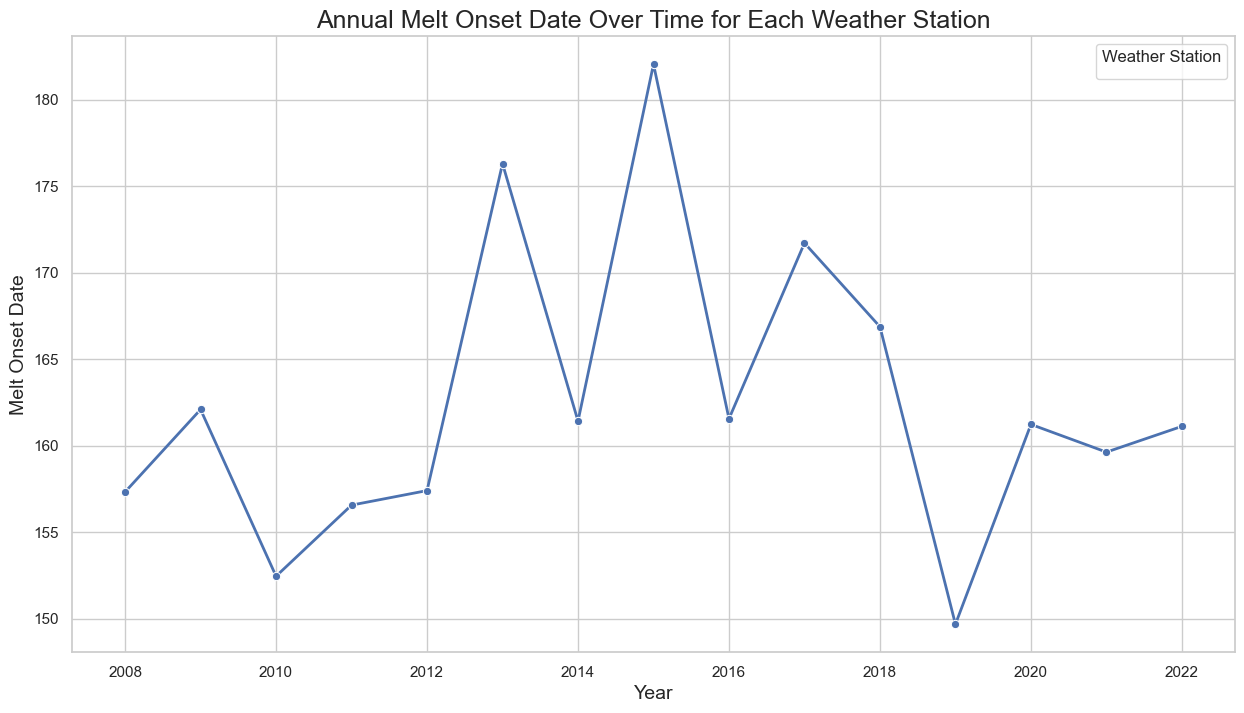

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df, and it has columns 'station_id', 'year', and 'melt_onset_date'
# Replace these column names with the actual names in your DataFrame
df_sum = df_event.groupby('Year')['DayOfYear'].mean()
# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_sum, marker='o', linewidth=2)

# Customize the plot
plt.title("Annual Melt Onset Date Over Time for Each Weather Station", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Melt Onset Date", fontsize=14)
plt.legend(title="Weather Station")

# Show the plot
plt.show()


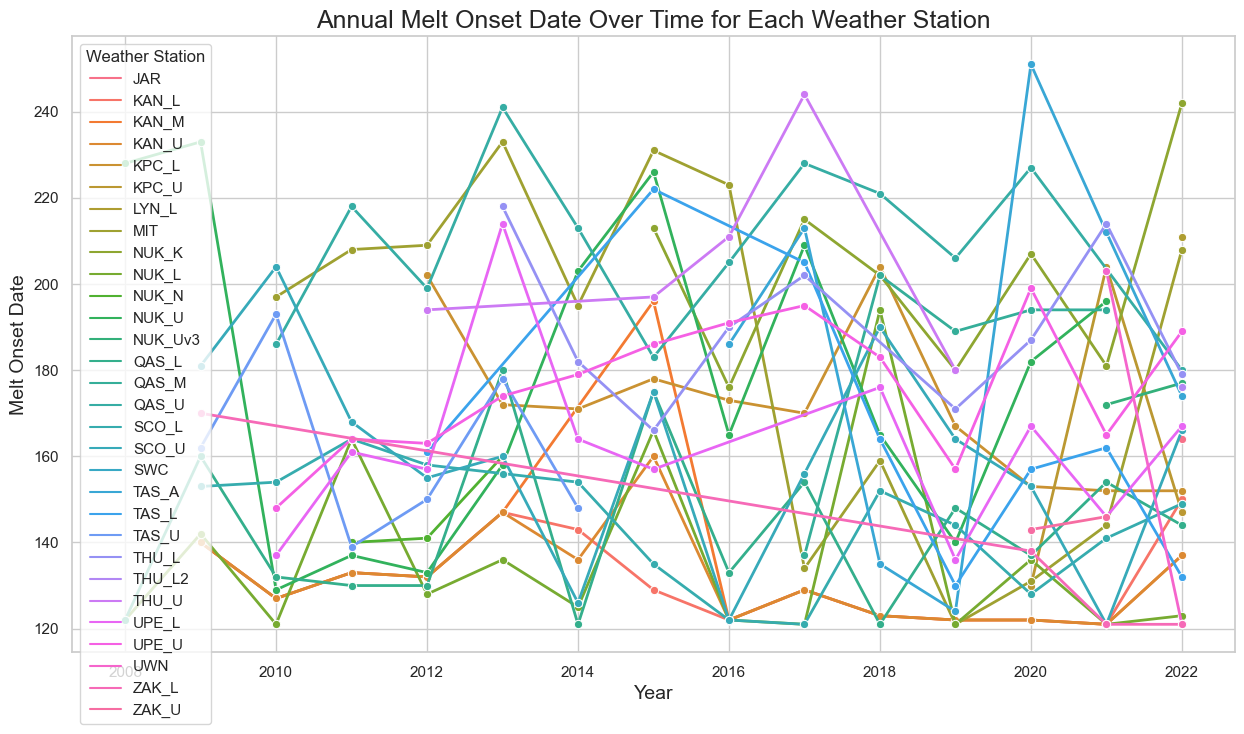

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df, and it has columns 'station_id', 'year', and 'melt_onset_date'
# Replace these column names with the actual names in your DataFrame

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_event, x='Year', y='DayOfYear', hue='stid', marker='o', linewidth=2)

# Customize the plot
plt.title("Annual Melt Onset Date Over Time for Each Weather Station", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Melt Onset Date", fontsize=14)
plt.legend(title="Weather Station")

# Show the plot
plt.show()


In [12]:
import plotly.express as px


display(df_sum)
# Assuming 'df' is the DataFrame containing the annual melt onset date for each station
fig = px.line(df_sum, title='Annual Melt Onset Date for Each Station')
fig.show()


Year
2008    157.333333
2009    162.100000
2010    152.461538
2011    156.571429
2012    157.411765
2013    176.312500
2014    161.428571
2015    182.058824
2016    161.562500
2017    171.722222
2018    166.882353
2019    149.684211
2020    161.238095
2021    159.636364
2022    161.125000
Name: DayOfYear, dtype: float64